## Importing liberaries

In [1]:
!pip install yellowbrick

In [2]:
from plotnine import *
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Importing data

In [3]:
df =pd.read_csv("marketing_campaign.csv", sep = '\t')

## Exploring and preprocessing the dataset

In [4]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
#To remove the NA values
df = df.dropna()

- exploring features with object type

In [8]:
df[['Education','Marital_Status', 'Dt_Customer']]

Education Marital_Status Dt_Customer
0     Graduation         Single  04-09-2012
1     Graduation         Single  08-03-2014
2     Graduation       Together  21-08-2013
3     Graduation       Together  10-02-2014
4            PhD        Married  19-01-2014
...          ...            ...         ...
2235  Graduation        Married  13-06-2013
2236         PhD       Together  10-06-2014
2237  Graduation       Divorced  25-01-2014
2238      Master       Together  24-01-2014
2239         PhD        Married  15-10-2012

[2216 rows x 3 columns]

In [9]:
#change date format
df["Dt_Customer"]= pd.to_datetime(df["Dt_Customer"])

In [10]:
print("Education Values: ", df["Education"].unique())
print("Marital_Status Values:", df["Marital_Status"].unique())

Education Values:  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status Values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [11]:
#give each feature a smaller set of values
edu= {"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"}
df["Education"]= df["Education"].replace(edu)

status= {"YOLO": "Single", "Absurd": "Single", "Alone": "Single", "Widow": "Single", "Divorced": "Single", "Together": "Taken", "Married": "Taken"}
df["Marital_Status"]= df["Marital_Status"].replace(status)

#new values
print("Education Values: ", df["Education"].unique())
print("Marital_Status Values:", df["Marital_Status"].unique())

Education Values:  ['Graduate' 'Postgraduate' 'Undergraduate']
Marital_Status Values: ['Single' 'Taken']


In [12]:
df["Marital_Status"] = df["Marital_Status"].replace({"Taken": 2, "Single": 1})

- feature engineering

In [13]:
#finding customer age
df["Age"]= datetime.now().year-df["Year_Birth"]

#finding family size and number of children
df["Children_Count"]= df["Kidhome"]+df["Teenhome"]
df["Family_Size"]= df["Children_Count"]+df["Marital_Status"]

#finding number of days since person became a customer
df["Customer_For"]= (datetime.now()-df["Dt_Customer"]).dt.days

#finding total spendings of customer
df["Spendings"]= df["MntWines"]+df["MntFruits"]+df["MntFishProducts"]+df["MntMeatProducts"]
+df["MntSweetProducts"]+df["MntGoldProds"]

#finding total number of purchases of customer
df["Purchases"]= df["NumDealsPurchases"]+df["NumWebPurchases"]+df["NumCatalogPurchases"]+df["NumStorePurchases"]

#finding total number of accepted campaigns
df["Accepted_Campaigns"]= df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]



In [14]:
#dropping un-needed columns
df= df.drop(["Year_Birth","Dt_Customer", "Complain","Response","ID","Z_CostContact","Z_Revenue",
                 "AcceptedCmp1","AcceptedCmp2","AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5" ],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

In [16]:
from sklearn.preprocessing import OrdinalEncoder

Edu_column = df[['Education']]
encoder = OrdinalEncoder()
df['Education'] = encoder.fit_transform(Edu_column)

In [17]:
df['Education'].unique()

array([0., 1., 2.])

- checking outliers:

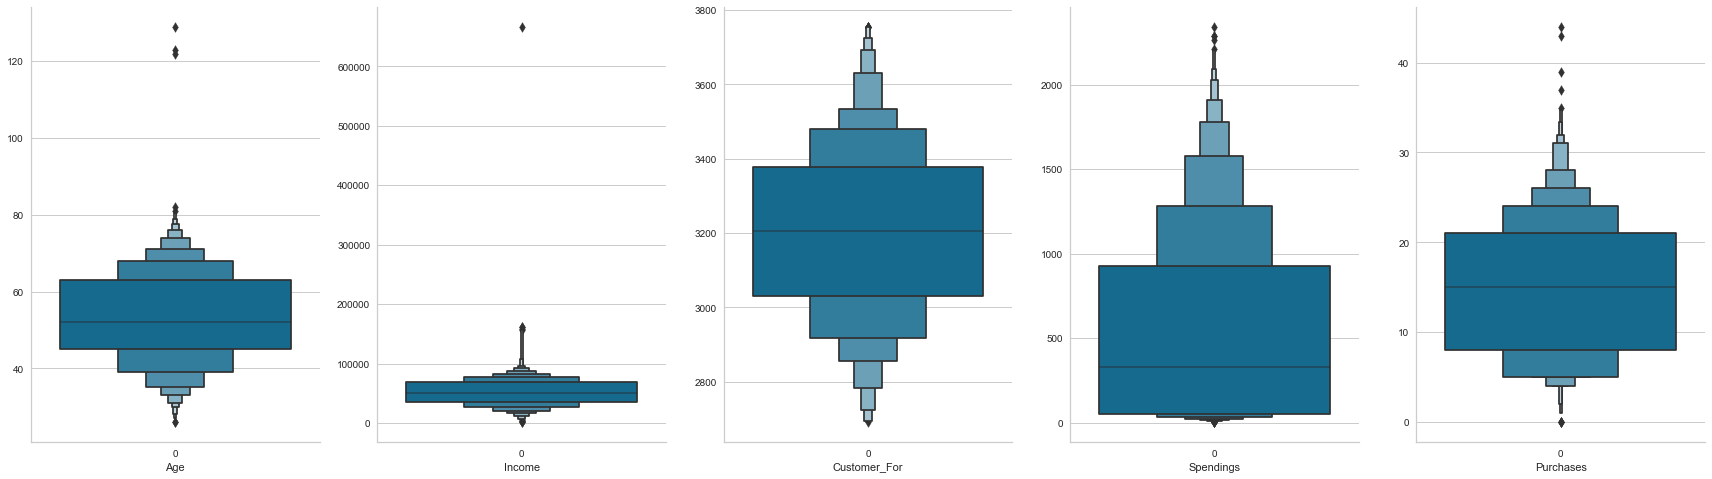

In [18]:
#examine the boxplots of different features
features= ["Age", "Income", "Customer_For", "Spendings", "Purchases"]

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
    sns.boxenplot(data=df[features[i]],
                showfliers=True,
                ax=axs[i],
                ).set(xlabel=features[i])
    sns.despine()

- we see that age and income have outliers

In [19]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

- scalling the features using StandardScaler

In [20]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )

In [21]:
scaled_df.head()

Education  Marital_Status    Income   Kidhome  Teenhome   Recency  \
0  -0.893586       -1.349603  0.287105 -0.822754 -0.929699  0.310353   
1  -0.893586       -1.349603 -0.260882  1.040021  0.908097 -0.380813   
2  -0.893586        0.740959  0.913196 -0.822754 -0.929699 -0.795514   
3  -0.893586        0.740959 -1.176114  1.040021 -0.929699 -0.795514   
4   0.571657        0.740959  0.294307  1.040021 -0.929699  1.554453   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0  0.977660   1.552041         1.690293         2.453472  ...   
1 -0.872618  -0.637461        -0.718230        -0.651004  ...   
2  0.357935   0.570540        -0.178542         1.339513  ...   
3 -0.872618  -0.561961        -0.655787        -0.504911  ...   
4 -0.392257   0.419540        -0.218684         0.152508  ...   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age  \
0             2.503607          -0.555814           0.692181  1.018352   
1            -0.571340          -1.171160          -0.132545  1.274785   
2            -0.229679           1.290224          -0.544908  0.334530   
3            -0.913000          -0.555814           0.279818 -1.289547   
4             0.111982           0.059532          -0.132545 -1.033114   

   Children_Count  Family_Size  Customer_For  Spendings  Purchases  \
0       -1.264598    -1.758359      1.973583   1.635802   1.317945   
1        1.404572     0.449070     -1.665144  -0.933518  -1.159273   
2       -1.264598    -0.654644     -0.172664   0.319500   0.796425   
3        0.069987     0.449070     -1.923210  -0.888315  -0.898513   
4        0.069987     0.449070     -0.822130  -0.282599   0.535666   

   Accepted_Campaigns  
0            -0.43916  
1            -0.43916  
2            -0.43916  
3            -0.43916  
4            -0.43916  

[5 rows x 24 columns]

- see the correlation between features

<AxesSubplot:>

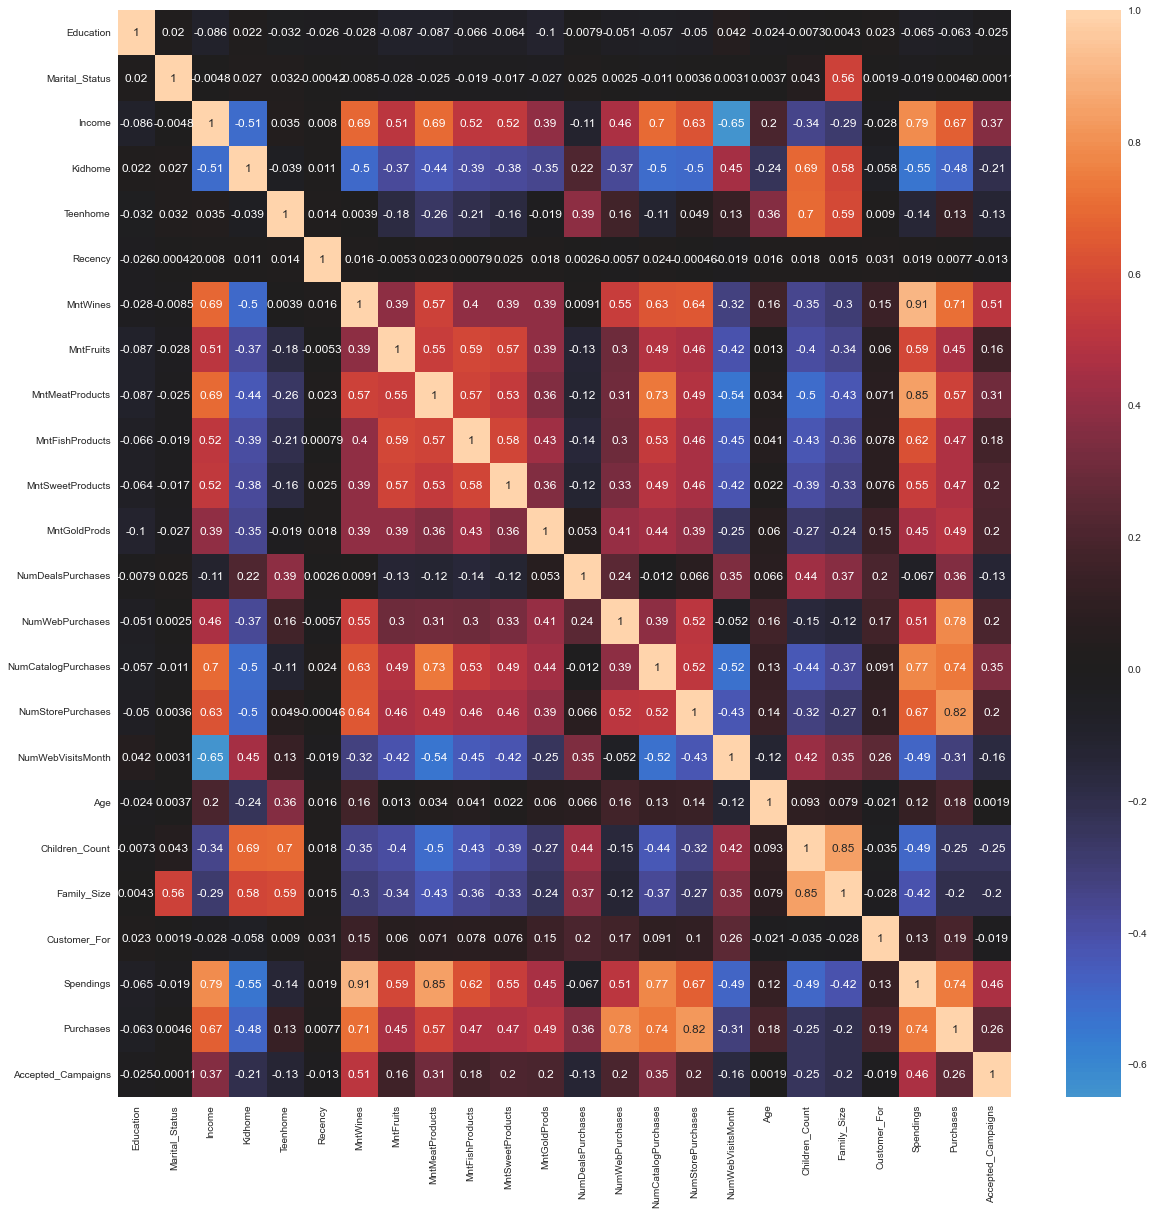

In [22]:
#correlation matrix
corrmat= scaled_df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

## applying pca

- see how variance changes throw number of components

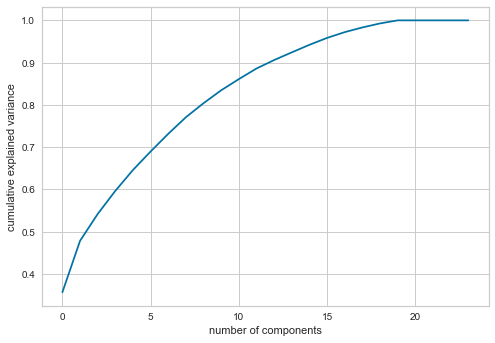

In [41]:
pca = PCA().fit(scaled_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [42]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
reduced_data = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))

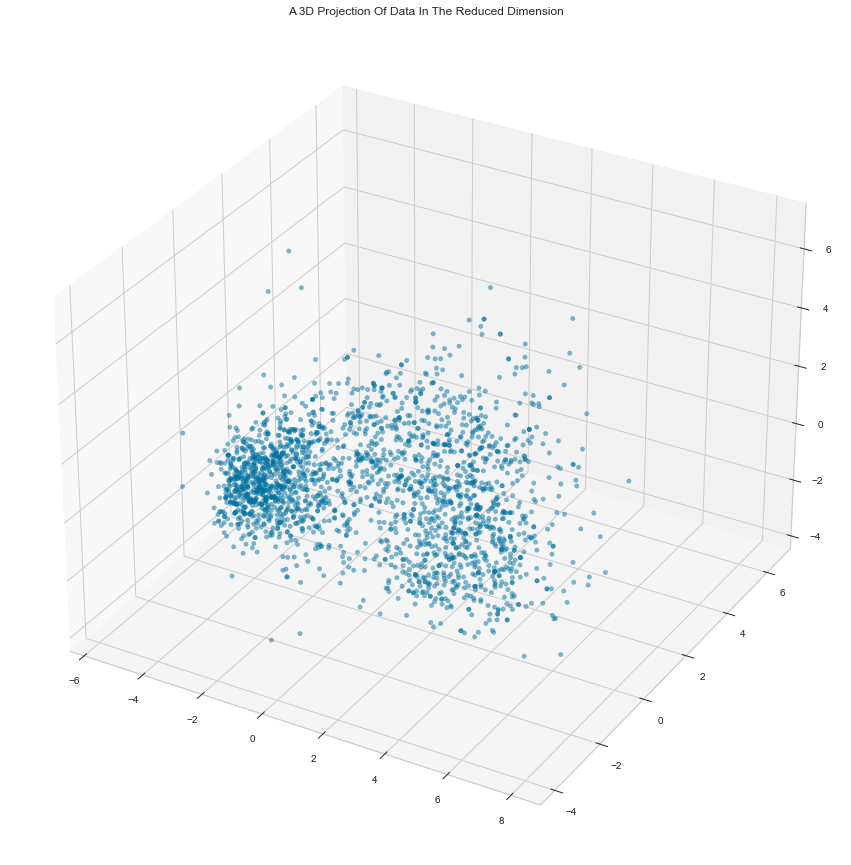

In [43]:
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(reduced_data.iloc[:,0],reduced_data.iloc[:,1],reduced_data.iloc[:,2], marker="o",s = 20, alpha = 0.5)
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Helping methods for applying clustering algoritms

In [44]:
def clustering_algorithms(df , kmeans , eps, min_samples, k_agg, affinity, gm_n_components):

    db = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
    km = KMeans(n_clusters=kmeans).fit(df)
    hac = AgglomerativeClustering(n_clusters=k_agg, affinity=affinity).fit(df)
    gm = GaussianMixture(n_components=gm_n_components, random_state=0).fit(df)

    df['gm'] = gm.predict(df)
    df['hac'] = hac.labels_
    df['km'] = km.labels_
    df['db'] = db.labels_
    
    return df
    


In [45]:
#print result of score in table
def score(df):
    results = {'clustering algorithm':['hierarchical clustering','kmeans clustering','gaussian clustering','DBSCAN clustering'],
               'silhouette_score': []}

    results['silhouette_score'].append(silhouette_score(df,df['hac']))
    results['silhouette_score'].append(silhouette_score(df,df['km']))
    results['silhouette_score'].append(silhouette_score(df,df['gm']))
    results['silhouette_score'].append(silhouette_score(df,df['db']))

    return pd.DataFrame.from_dict(results).sort_values('silhouette_score', ascending = False)

In [46]:
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors


def draw_best_eps(df):

    nearest_neighbors = NearestNeighbors(n_neighbors=11)
    neighbors = nearest_neighbors.fit(df)

    distances, indices = neighbors.kneighbors(df)
    distances = np.sort(distances[:,10], axis=0)

    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

    fig = plt.figure(figsize=(5, 5))
    knee.plot_knee()
    plt.xlabel("Data Points sorted by distance")
    plt.ylabel("Epsilon")
    plt.show()
    print(f'best epsilon value = {distances[knee.knee]}')


In [47]:
from mpl_toolkits.mplot3d import axes3d
def draw_plots(data):
    plot_names = ['Hierarchical Agglomeretive', 'KMeans', 'Gaussian Mixtures', 'DBSCAN']
    for i, cluster  in enumerate(data[['hac','km','gm','db']]):
        fig = plt.figure(figsize=(15,15))
        ax = fig.gca(projection='3d')
        ax = fig.add_subplot(111, projection="3d")
        s = ax.scatter(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],cmap='Paired', c =data[cluster] , edgecolor = "black",
                   s = 50, label=data[cluster])
        ax.set_title(plot_names[i], size = 20)
        plt.legend(s.legend_elements()[0], list(set(data[cluster])), title = '# of clusters')
        plt.show()

## applying the clustering methods

### - choosing best suitable k and epslon 

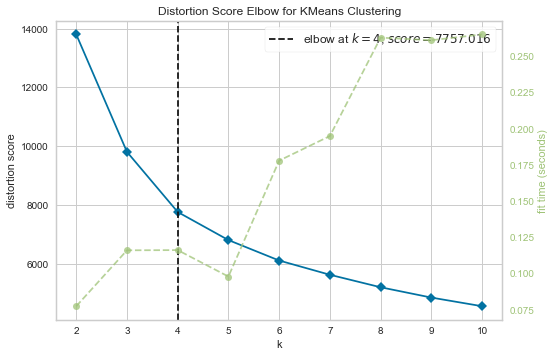

In [48]:
# choosing the best K for KMeans
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(reduced_data)
Elbow_M.show();

<Figure size 360x360 with 0 Axes>

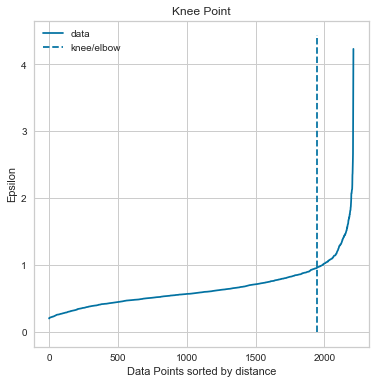

best epsilon value = 0.9641756172028114


In [51]:
# choosing best epslon for dbscan
draw_best_eps(reduced_data)

###  applying clustering trials:

- trial 1:

In [55]:
data = clustering_algorithms(df = reduced_data, kmeans = 4, eps =0.96,min_samples= 6,k_agg=4,
                             affinity='euclidean', gm_n_components=4)
score(data)

clustering algorithm  silhouette_score
1        kmeans clustering          0.510203
0  hierarchical clustering          0.509173
3        DBSCAN clustering          0.434828
2      gaussian clustering          0.383366

C:\Users\hp\AppData\Local\Temp/ipykernel_9988/3967263911.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


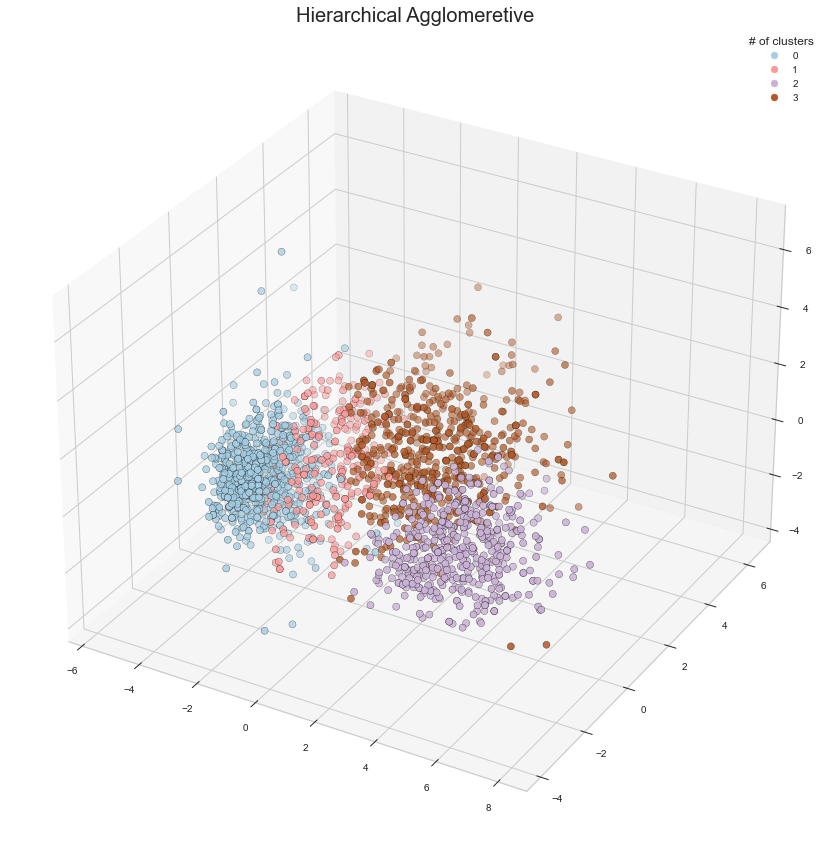

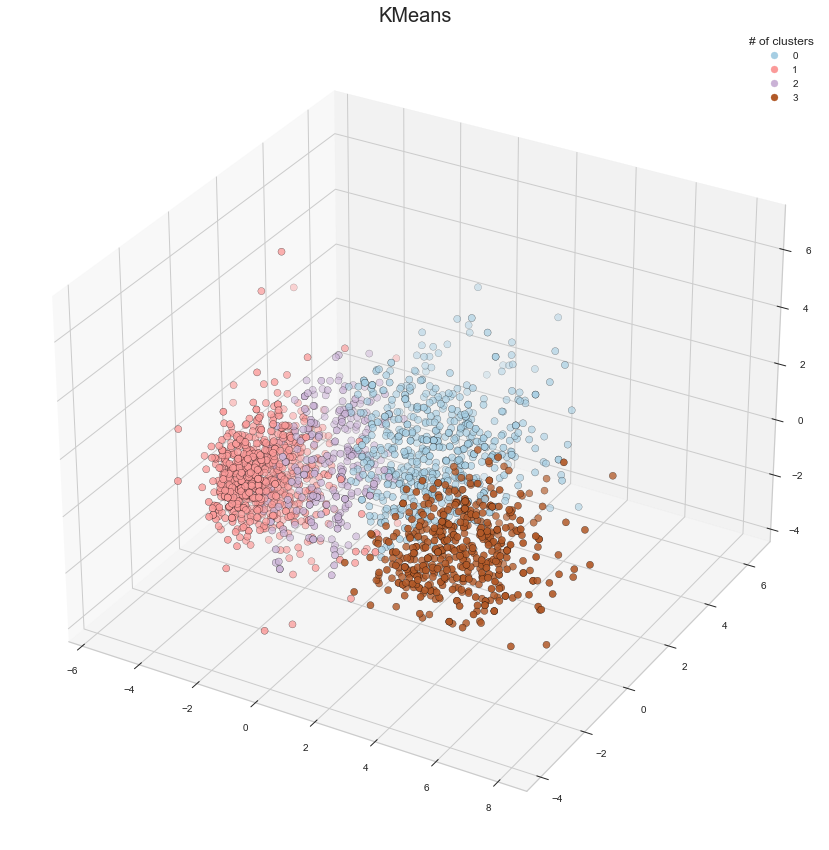

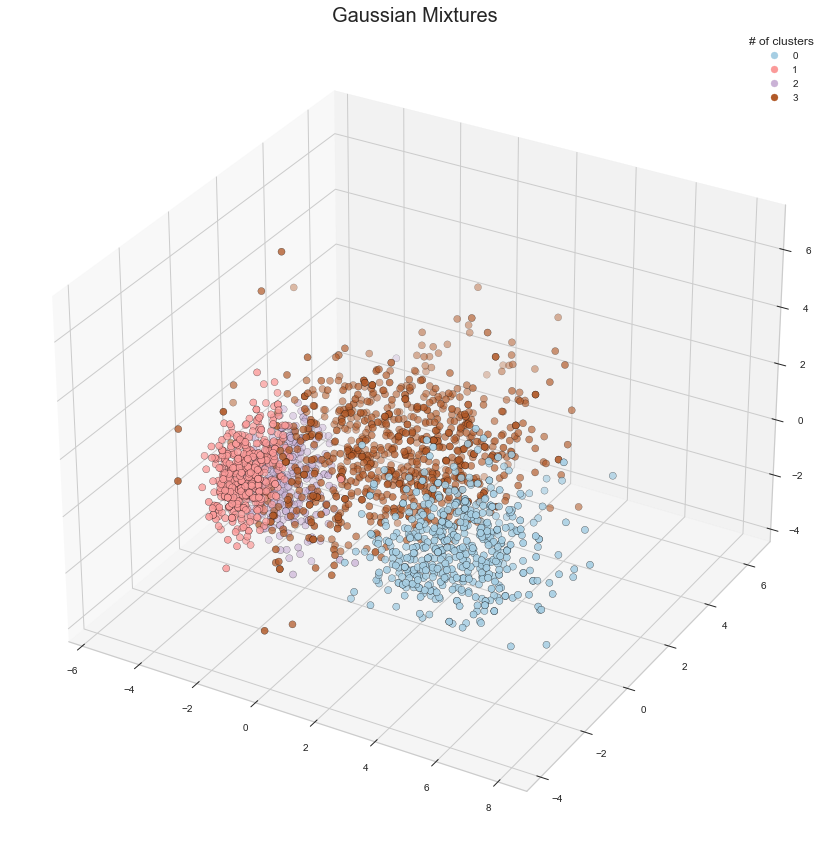

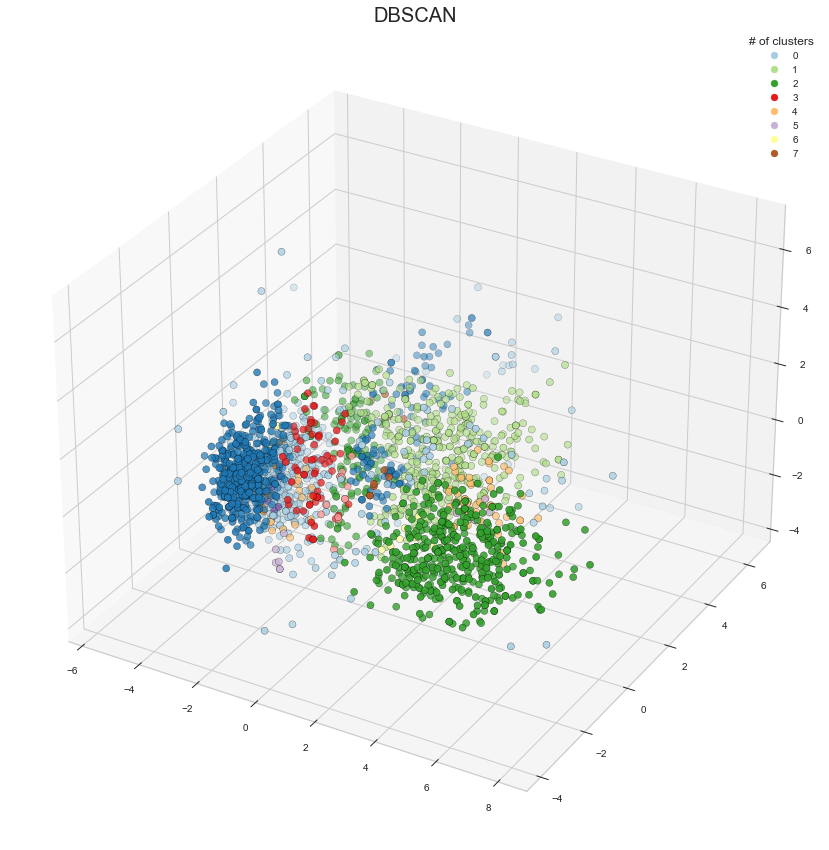

In [56]:
draw_plots(data)

- trial 2:

In [57]:
data2 = clustering_algorithms(df = reduced_data, kmeans = 4, eps = 2,min_samples=6, k_agg=4,
                             affinity='euclidean', gm_n_components=4)
score(data2)

clustering algorithm  silhouette_score
0  hierarchical clustering          0.484403
2      gaussian clustering          0.481462
1        kmeans clustering          0.481326
3        DBSCAN clustering          0.452870

C:\Users\hp\AppData\Local\Temp/ipykernel_9988/3967263911.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


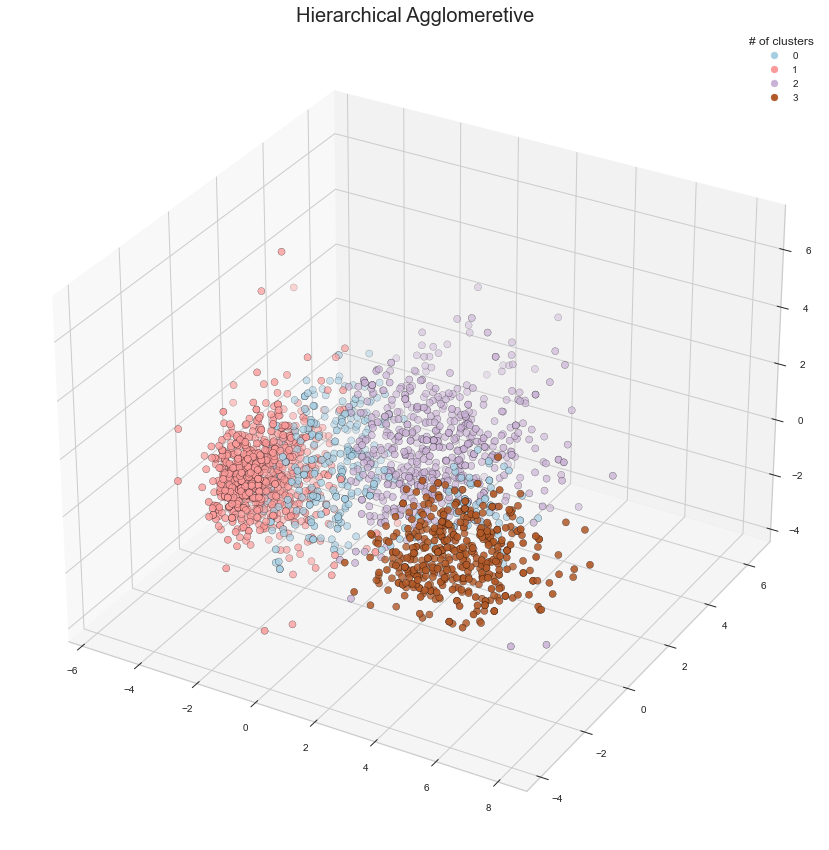

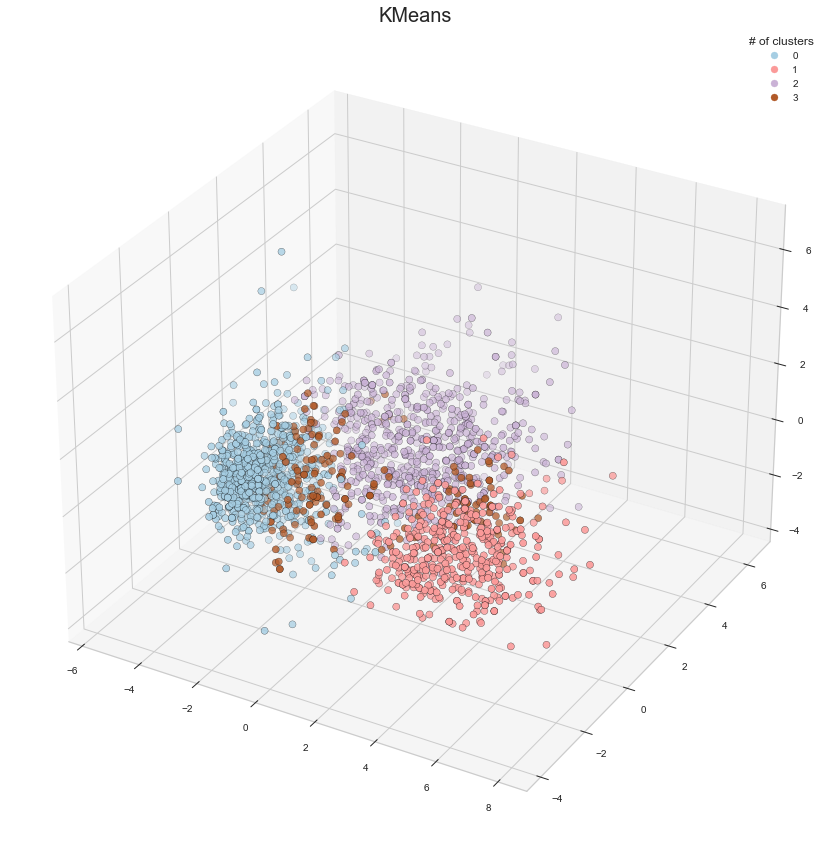

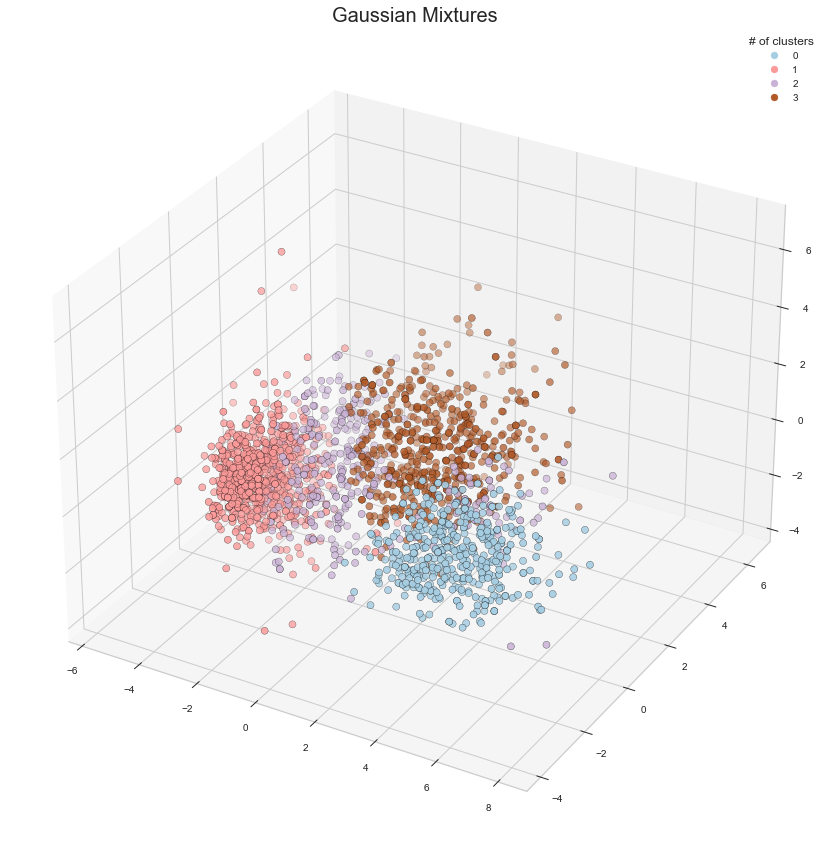

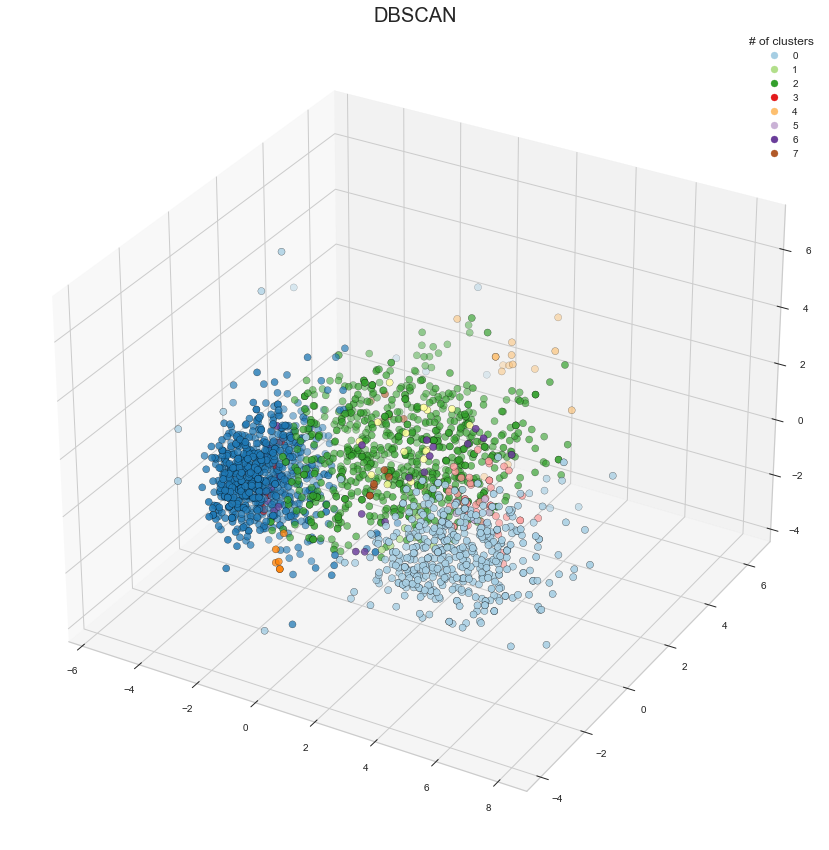

In [58]:
draw_plots(data2)

- trial 3:

In [64]:
data3 = clustering_algorithms(df = reduced_data, kmeans = 5, eps = 1.4,min_samples=6, k_agg=5,
                             affinity='euclidean', gm_n_components=4)
score(data3)

clustering algorithm  silhouette_score
1        kmeans clustering          0.557372
0  hierarchical clustering          0.554219
2      gaussian clustering          0.536114
3        DBSCAN clustering          0.478921

C:\Users\hp\AppData\Local\Temp/ipykernel_9988/3967263911.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


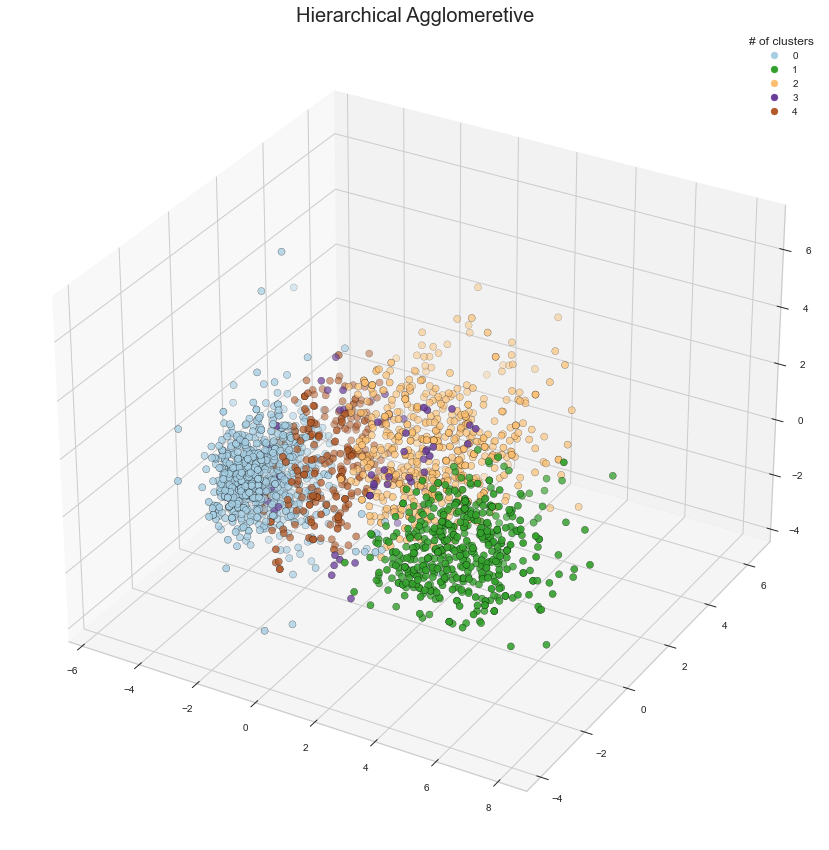

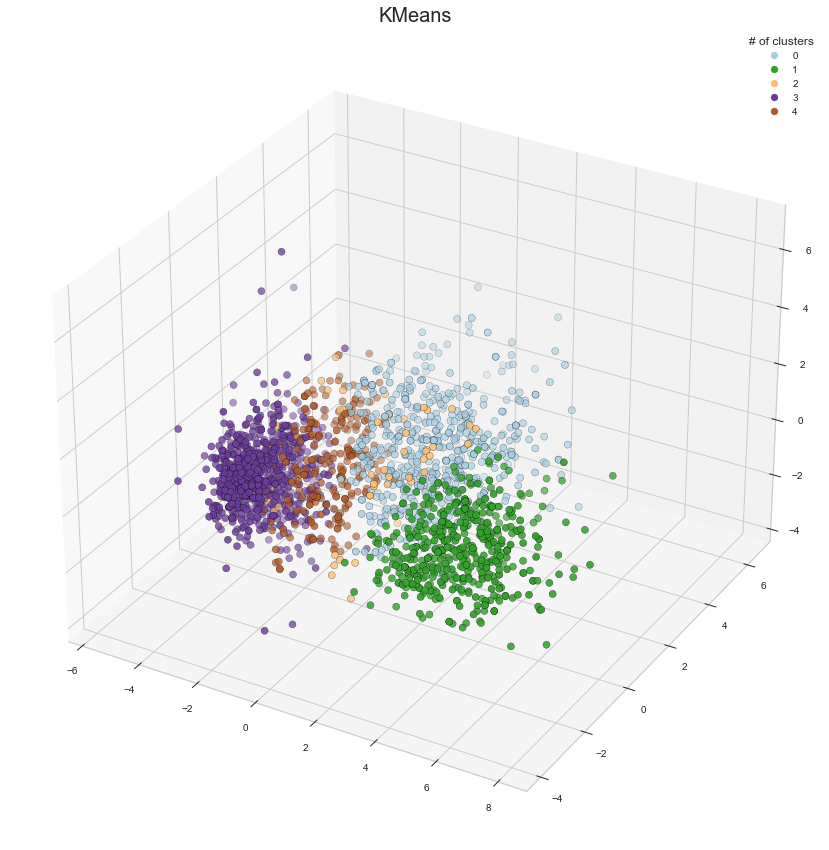

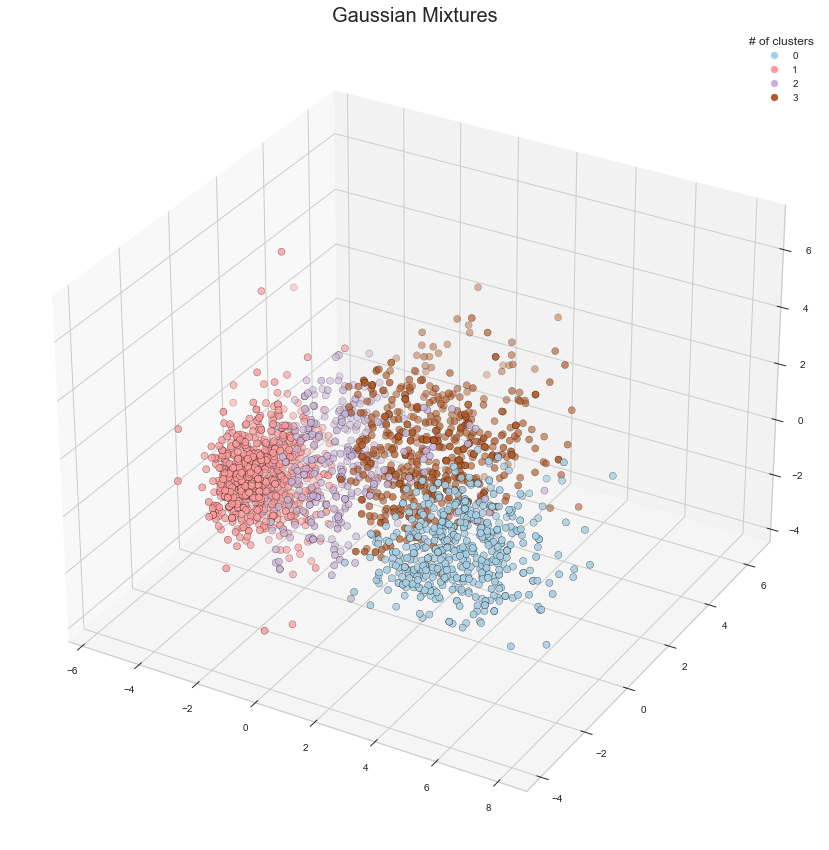

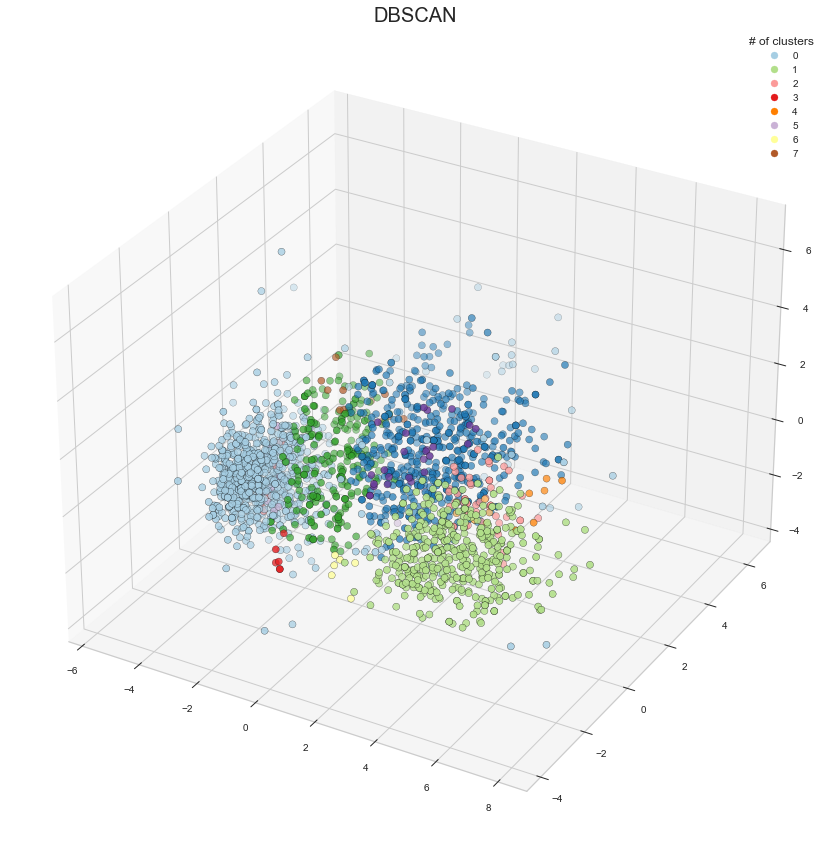

In [65]:
draw_plots(data3)

## Conclusion:
- The best models to cluster this dataset were **"KMeans"** and **"hierarchical clustering"** as they gave usw the highest **silhouette_score** which was **55%** 